# Name: Gaurav Marathe
# Roll No.: 45046

In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train[0].min(), x_train[0].max()


(0.0, 1.0)

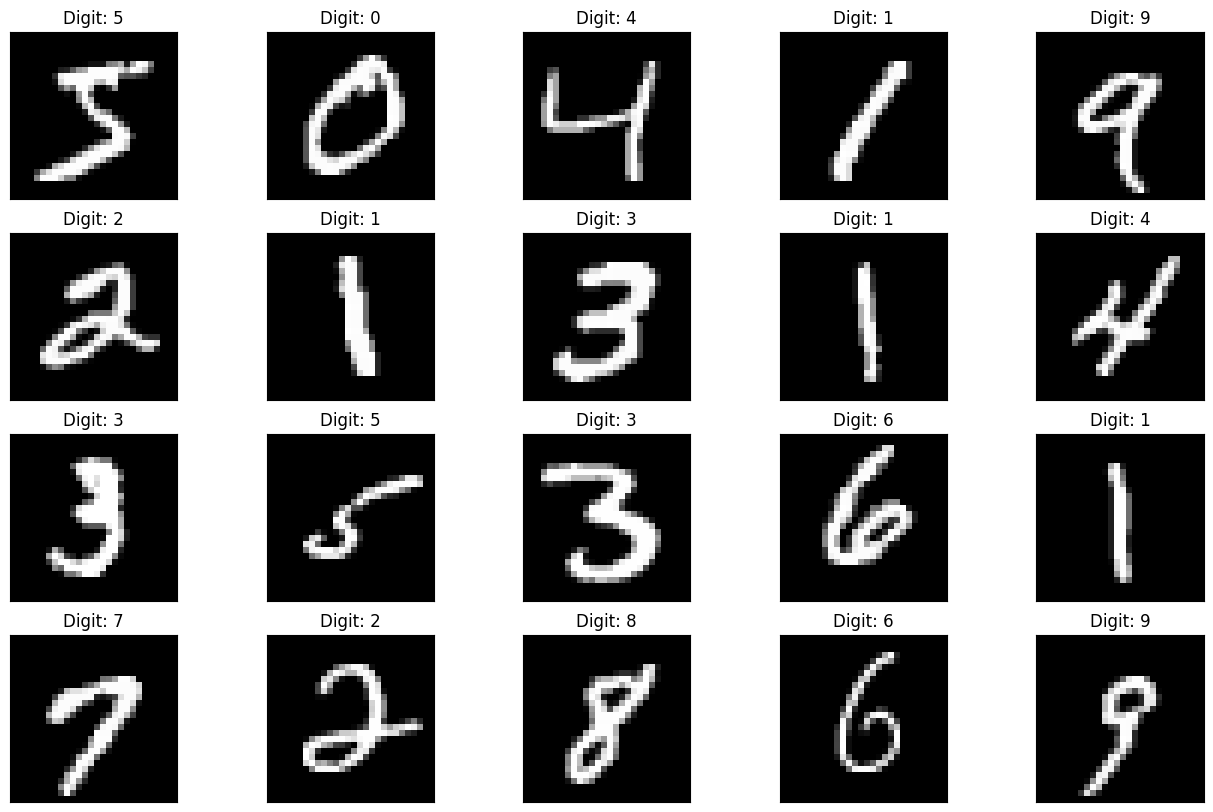

In [7]:
plt.figure(figsize=(16,10))
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
plt.show()

In [8]:
x_train = x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
MaxPooling2D((2,2)),
Flatten(),
Dense(100, activation="relu"),
Dense(10, activation="softmax")
])

In [10]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=['accuracy']
    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2319 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0770 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0513 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0375 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0152 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 39s 21m

1/1 [==============================] - 0s 26ms/step


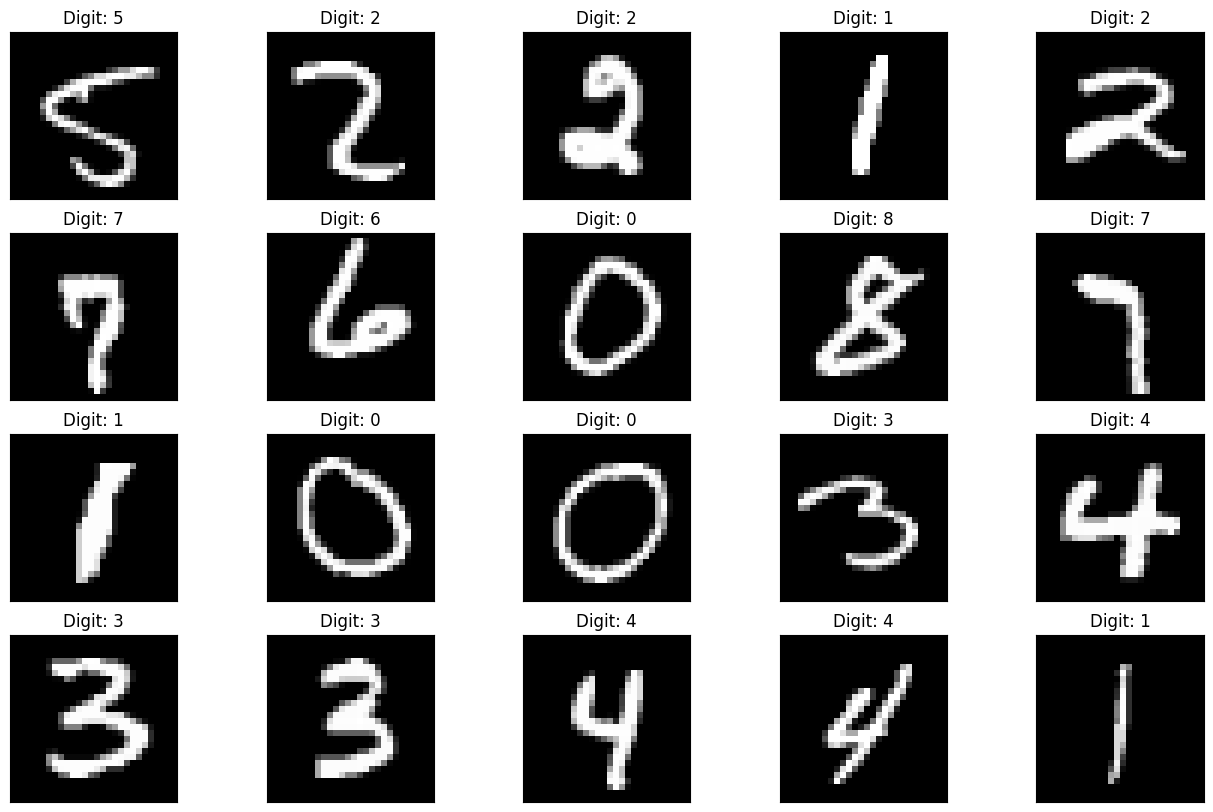

In [12]:
plt.figure(figsize=(16,10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1,28,28,1)))[0], axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [13]:
predict = model.predict(x_test)
predictions = [np.argmax(i) for i in predict]
accuracy_score(y_test, predictions)

313/313 [==============================] - 3s 11ms/step


0.9847

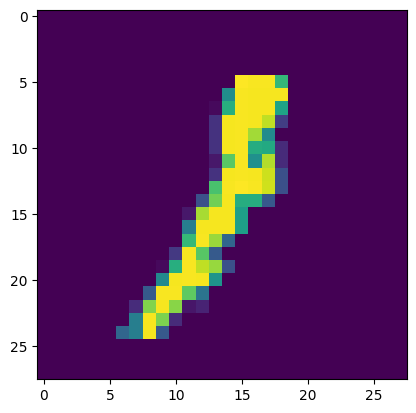

313/313 [==============================] - 3s 8ms/step
Handwritten number in the image is= 1
Test loss: 0.052636999636888504
Test Accuracy: 0.9847000241279602


In [14]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print('Handwritten number in the image is= %d' %np.argmax(predicted_value[n]))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

In [15]:
%matplotlib inline

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0441 - val_accuracy: 0.9870
Epoch 2/10
1635/1875 [=========================>....] - ETA: 4s - loss: 0.0032 - accuracy: 0.9994

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [ ]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

In [ ]:
predict[0]